# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**
GROUP-43
---

**Project Group Information:**

- Names: AWATAPALLY PRANAV
- Student IDs: 218517695
- Emails: vawatapally@deakin.edu.au 

---

# 1.Import Spark

In [113]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

In [0]:
# import find spark
import findspark
#initalizing findspark
findspark.init()
#importing sparksession from pyspark.sql
from pyspark.sql import SparkSession 

# 2.Read and check data

In [0]:
import wget
#providing data url to download the data
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
#Naming data as Dataset which is present in attribute "link to data"
DataSet = wget.download(link_to_data)

In [116]:
!ls

'bank (1).csv'		     spark-2.4.0-bin-hadoop2.7.tgz
'bank (2).csv'		     spark-2.4.0-bin-hadoop2.7.tgz.1
'bank (3).csv'		     spark-2.4.0-bin-hadoop2.7.tgz.2
 bank.csv		     spark-2.4.0-bin-hadoop2.7.tgz.3
 sample_data		     spark-warehouse
 spark-2.4.0-bin-hadoop2.7


In [117]:
# Import the 'bank.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
#assining the data to dataframe df
df = spark.read.csv('bank.csv', header = True, inferSchema = True) 
#printing the dataframe
df.printSchema() 
#top 5 rows in the dataframe
df.show(5)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+--

In [118]:
# Check data distribution
# You may use printSchema() 
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



# 3.Select features

In [119]:
#Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2 = df.select("age","job","marital","education","default","balance","housing","loan","campaign","pdays","previous","poutcome","deposit")
cols = df2.columns
#to print the table
df2.printSchema()
#to describe the attributes
df2.describe()
#to show the rows
df2.show()



root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+-----------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  

In [120]:
#Remove invalid rows/records using spark.sql 
df2.registerTempTable("bank")
#importing the libraries
from pyspark import SparkContext
from pyspark.sql import SQLContext
#creating an object
sc = SparkContext.getOrCreate()
#passing a object
sqlContext = SQLContext(sc)
# passing a SQL Query to remove the Duplicate data
bankdata = sqlContext.sql("SELECT * FROM bank WHERE (poutcome not in ('unknown', 'other'))")
#displaying the dta
bankdata.show()
#deleting the data
df2 = df2.na.drop()


+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
| 56|  technician| married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
| 34|      admin.| married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|     no|   5115|    yes|  no|       2|  171|       4| failure|    yes|
| 45|entrepreneur| married|secondary|     no|    781|     no| yes|       2|  126|       2| failure|    yes|
| 46|  unemployed|divorced|s

In [121]:
#Covert categorical features to metric features using One hot encoding
import pandas as pd
#importing various function from pyspark.ml to perform various convertions
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
#selecting specific columns and assigning it to the variable categ_cols
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
stages = []
for categoricalCol in categoricalColumns:
  #performing indexing on the attributes in categ_cols
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    #using onehotencodingestimator converting data
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages = stages + [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
#importing pipeline to perform data conversions
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df2)
df2 = pipelineModel.transform(df2)
selectedCols = ['label', 'features'] + cols
df2 = df2.select(selectedCols)
df2.printSchema()
pd.DataFrame(df2.take(5), columns=df2.columns).transpose()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



,0,1,2,3,4
label,1,1,1,1,1
features,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no


## 3.1 normalisation

In [122]:
#Apply Min-Max normalisation on each attribute using MinMaxScaler  
from pyspark.ml.feature import MinMaxScaler
#importing minmax normalization scalar
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(df2)
scaledData = scalerModel.transform(df2)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaledData.select("features", "scaledFeatures").show()
  


Features scaled to range: [0.000000, 1.000000]
+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|(27,[3,11,13,16,1...|[0.0,0.0,0.0,1.0,...|
|(27,[3,11,13,16,1...|[0.0,0.0,0.0,1.0,...|
|(27,[2,11,13,16,1...|[0.0,0.0,1.0,0.0,...|
|(27,[4,11,13,16,1...|[0.0,0.0,0.0,0.0,...|
|(27,[3,11,14,16,1...|[0.0,0.0,0.0,1.0,...|
|(27,[0,12,14,16,1...|[1.0,0.0,0.0,0.0,...|
|(27,[0,11,14,16,1...|[1.0,0.0,0.0,0.0,...|
|(27,[5,13,16,18,1...|[0.0,0.0,0.0,0.0,...|
|(27,[2,11,13,16,1...|[0.0,0.0,1.0,0.0,...|
|(27,[4,12,13,16,1...|[0.0,0.0,0.0,0.0,...|
|(27,[3,12,13,16,1...|[0.0,0.0,0.0,1.0,...|
|(27,[1,11,13,16,1...|[0.0,1.0,0.0,0.0,...|
|(27,[0,11,14,16,1...|[1.0,0.0,0.0,0.0,...|
|(27,[1,12,14,16,1...|[0.0,1.0,0.0,0.0,...|
|(27,[2,12,14,16,1...|[0.0,0.0,1.0,0.0,...|
|(27,[0,14,16,18,1...|[1.0,0.0,0.0,0.0,...|
|(27,[1,12,15,16,1...|[0.0,1.0,0.0,0.0,...|
|(27,[4,11,13,16,1...|[0.0,0.0,0.0,0.0,...|
|(27,[3,11,13,16,1...|[0.0,0.

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
#importing numpy package
import numpy as np
cost = np.zeros(20)
# k is set as 2 as the centroid cluster are normally given as 2
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df2.sample(False,0.1, seed=42))
    cost[k] = model.computeCost(df2) 

Text(0, 0.5, 'cost')

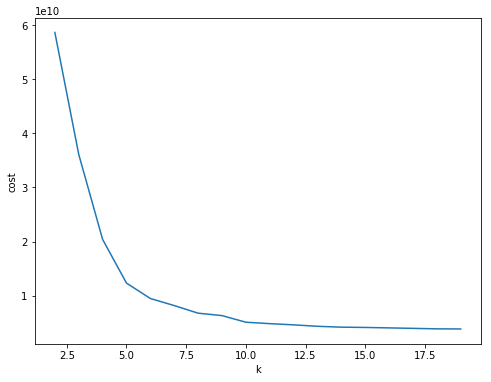

In [124]:
import matplotlib.pyplot as plt
# data is plotted for better understanding
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

# 4.Unsupervised learning

## 4.1 K-means

In [0]:
# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  
# df2 is loaded for both the sets
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(df2)

In [126]:
predictions = model.transform(df2)
#clustering is used to get the outputs for the clusters centriod centers
evaluator = ClusteringEvaluator()
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.26554465e-01 1.77185601e-01 1.62038336e-01 1.21365124e-01
 8.44319776e-02 6.80691912e-02 3.60916316e-02 3.22580645e-02
 3.18840580e-02 2.93595138e-02 2.46844320e-02 5.67367929e-01
 3.15848527e-01 4.96306685e-01 3.25385694e-01 1.34081346e-01
 9.84291725e-01 5.21084619e-01 8.65544647e-01 7.47732585e-01
 1.10144928e-01 9.44366526e-02 4.10874240e+01 1.04602917e+03
 2.50313230e+00 5.11942964e+01 8.29827022e-01]
[3.06209850e-01 1.04925054e-01 1.92719486e-01 7.70877944e-02
 4.28265525e-02 1.07066381e-01 4.06852248e-02 3.21199143e-02
 3.42612420e-02 2.99785867e-02 2.14132762e-02 6.05995717e-01
 2.99785867e-01 3.59743041e-01 4.47537473e-01 1.41327623e-01
 1.00000000e+00 6.59528908e-01 9.52890792e-01 7.04496788e-01
 1.07066381e-01 1.30620985e-01 4.45417559e+01 1.25787259e+04
 2.62955032e+00 5.44475375e+01 8.95074946e-01]


## 4.2 PCA

+-------------------------------------------+
|pcaFeatures                                |
+-------------------------------------------+
|[-2343.023259771129,-2.377951396858739]    |
|[-45.02262340052814,-1.0272084689945573]   |
|[-1270.0160760320578,-1.7488098781150336]  |
|[-2476.0215663544914,-2.4566545740300025]  |
|[-184.021767052275,-1.1117378034379481]    |
|[-0.016820070173197466,-1.0042676876394945]|
|[-830.0224297080015,-1.48872633668871]     |
|[-545.0241468259201,-1.3205998084119144]   |
|[-1.014746017388253,-1.0029496189956724]   |
|[-5090.009659297503,-4.001157694137119]    |
|[-100.01512481104773,-1.0606600724750708]  |
|[-309.0117449559676,-1.1873174373385382]   |
|[-199.0113587155574,-1.1278286617600615]   |
|[-460.01835748225386,-1.2744751454902048]  |
|[-703.0120783835595,-1.418684970161833]    |
|[-3837.012943942598,-3.258694632283479]    |
|[-611.0124892922124,-1.367283053437262]    |
|[7.980278090410327,-0.9965064559983403]    |
|[-55.01637520834916,-1.0367173744

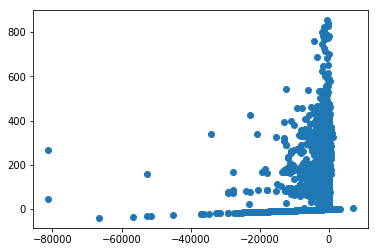

In [127]:
#Generate a scatter plot using the first two PCA components to investigate the data distribution.

from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df2)

result = model.transform(df2).select("pcaFeatures")
result.show(truncate=False)

pd.DataFrame(result.take(5), columns=result.columns).transpose()

features = result.select('pcaFeatures')

features = features.toPandas()

X = [] 
Y = []

for pcaFeature in features.pcaFeatures:
    X.append(pcaFeature[0])    
    Y.append(pcaFeature[1])
    
plt.scatter(X, Y) 
plt.show()



# 5.Supervised learning

In [128]:
train, test = df2.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7822
Test Dataset Count: 3340


## 5.1 LogisticRegression

In [0]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

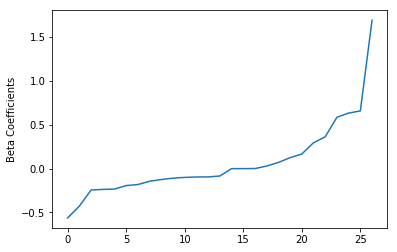

In [130]:
import matplotlib.pyplot as plt
import numpy as np
#coefficients are generated 

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

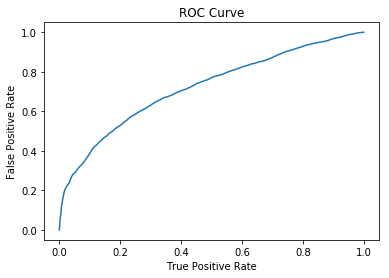

Training set areaUnderROC: 0.7205533652244152


LogisticRegression_6fe1533a1aba

In [131]:
#for beter prediction additional performance measures are also used
trainingSummary = lrModel.summary

# ROC is also used just for the predicition of performance scale
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))
# f-measure is used here for the performance scale
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)


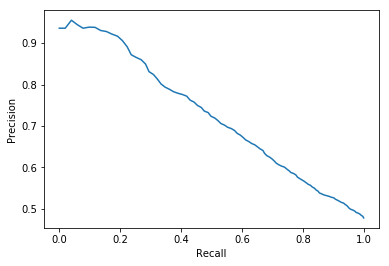

In [132]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [133]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)


+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 31|management|  0.0|[0.22293466476661...|       0.0|[0.55550397803186...|
| 35|management|  0.0|[1.28519700296627...|       0.0|[0.78333312266007...|
| 40|management|  0.0|[0.63181697807069...|       0.0|[0.65290134222086...|
| 50|management|  0.0|[0.12755611470830...|       0.0|[0.53184586120903...|
| 52|management|  0.0|[0.61545851030502...|       0.0|[0.64918495428791...|
| 52|management|  0.0|[0.32971071141793...|       0.0|[0.58168898680915...|
| 56|management|  0.0|[0.51367135652849...|       0.0|[0.62566673099898...|
| 57|management|  0.0|[0.32678618134526...|       0.0|[0.58097720040521...|
| 58|management|  0.0|[1.18444132418935...|       0.0|[0.76574542578444...|
| 46|management|  0.0|[0.72413818872764...|       0.0|[0.67351762271109...|
+---+-------

In [134]:
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
#accuracy is determinrd with the help of evaluators
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

Test Area Under ROC 0.7152050819967559
Test Error = 0.33024 


In [135]:

evaluator2 = MulticlassClassificationEvaluator()
print('Test Area Under ROC', evaluator2.evaluate(predictions))#Exam the coefficients

Test Area Under ROC 0.6649138377072391


## 5.2 Decision tree

In [136]:
#Decision tree

from pyspark.ml.classification import DecisionTreeClassifier 

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

evaluator = MulticlassClassificationEvaluator()
silhouette = evaluator.evaluate(predictions)
print("accuracy :", silhouette)



+---+----------+-----+---------------+----------+--------------------+
|age|       job|label|  rawPrediction|prediction|         probability|
+---+----------+-----+---------------+----------+--------------------+
| 31|management|  0.0|[1057.0,1453.0]|       1.0|[0.42111553784860...|
| 35|management|  0.0|[1057.0,1453.0]|       1.0|[0.42111553784860...|
| 40|management|  0.0|  [663.0,409.0]|       0.0|[0.61847014925373...|
| 50|management|  0.0|[1057.0,1453.0]|       1.0|[0.42111553784860...|
| 52|management|  0.0|  [663.0,409.0]|       0.0|[0.61847014925373...|
| 52|management|  0.0|  [663.0,409.0]|       0.0|[0.61847014925373...|
| 56|management|  0.0|[1057.0,1453.0]|       1.0|[0.42111553784860...|
| 57|management|  0.0|  [663.0,409.0]|       0.0|[0.61847014925373...|
| 58|management|  0.0|  [663.0,409.0]|       0.0|[0.61847014925373...|
| 46|management|  0.0|  [663.0,409.0]|       0.0|[0.61847014925373...|
+---+----------+-----+---------------+----------+--------------------+
only s

## 5.3 NaiveBayes

In [137]:
#NaiveBayes
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
nb = NaiveBayes(labelCol = "label",featuresCol = "Features",smoothing =1.0,modelType = "multinomial")
predictions=model.transform(test)
evaluator = BinaryClassificationEvaluator()

print("Accuracy : ",silhouette)

Accuracy :  0.6424871764266611
